In [163]:
#Importing all reqired modules
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.validation import column_or_1d
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [97]:
#Importing Data file
data = pd.read_csv('Desktop/Technook/data (1).csv')
data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [145]:
#Defining x and y attributes
x = data.drop(columns = 'fail')
y = data['fail']

In [98]:
#checking for null values
data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [124]:
# Creating a Logistic Regression Object, performing Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [125]:
#accuracy score of training data
log_reg.score(x_train, y_train)

0.9242424242424242

In [126]:
#accuracy score of testing data
log_reg.score(x_test, y_test)

0.8838028169014085

In [102]:
#accuracy score of prediction
score = accuracy_score(y_pred, y_test)
score

0.8838028169014085

In [156]:
rf = RandomForestClassifier(random_state=42).fit(x_train, y_train)
y_prob = rf.predict_proba(x_test)[:, 1]


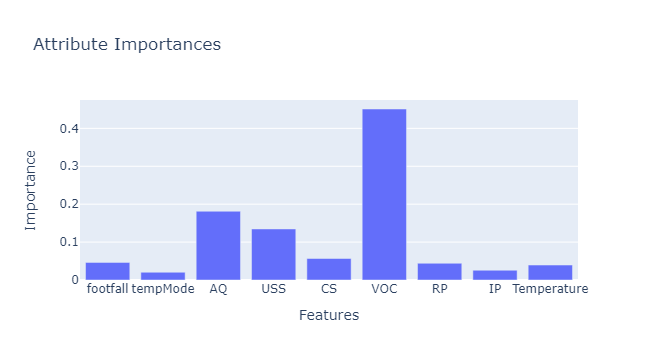

In [161]:
importances = rf.feature_importances_

# Create a bar chart of importances of different attributes
fig = go.Figure(data=go.Bar(x=x.columns, y=importances))
fig.update_layout(title="Attribute Importances", xaxis_title="Features", yaxis_title="Importance")
fig.show()

In [164]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.9449596774193548


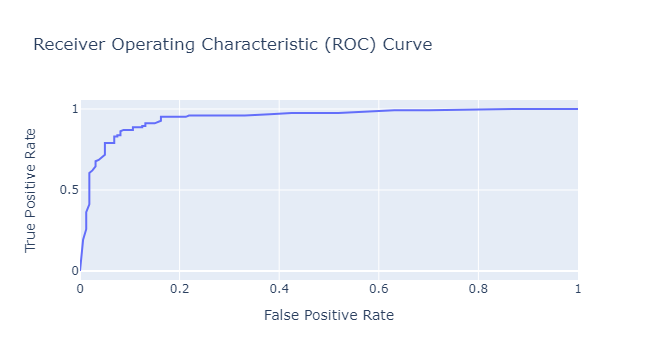

In [165]:
# Create an ROC curve plot
fig = go.Figure(data=go.Scatter(x=fpr, y=tpr, mode="lines", name="ROC Curve"))
fig.update_layout(title="Receiver Operating Characteristic (ROC) Curve",
                  xaxis_title="False Positive Rate",
                  yaxis_title="True Positive Rate")
fig.show()

In [148]:
#Confusion matrix calculation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[142,  18],
       [ 15, 109]], dtype=int64)

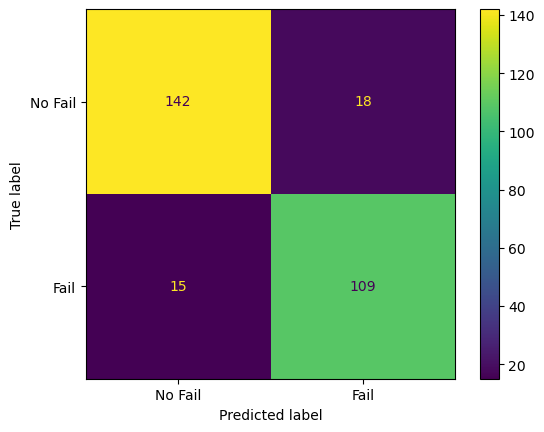

In [144]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = ["No Fail", "Fail"])

# display matrix
cm_display.plot()
plt.show()


<Axes: xlabel='footfall', ylabel='fail'>

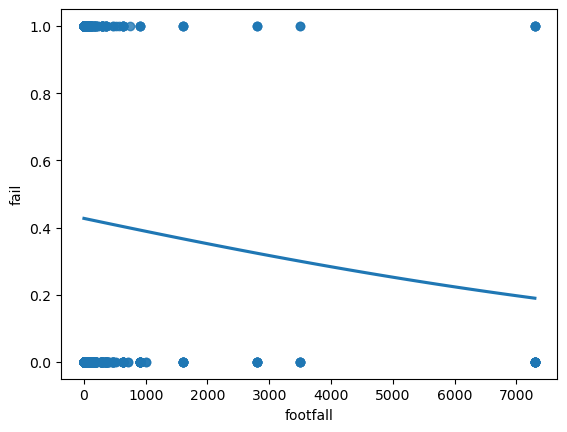

In [103]:
#Plotting all attributes against fail attribute
sns.regplot(x=data['footfall'], y=data['fail'], data=data, logistic=True, ci=None)

<Axes: xlabel='tempMode', ylabel='fail'>

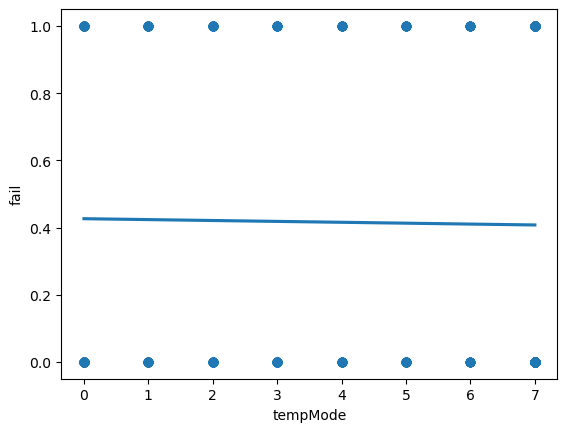

In [106]:
sns.regplot(x=data['tempMode'], y=data['fail'], data=data, logistic=True, ci=None)


<Axes: xlabel='AQ', ylabel='fail'>

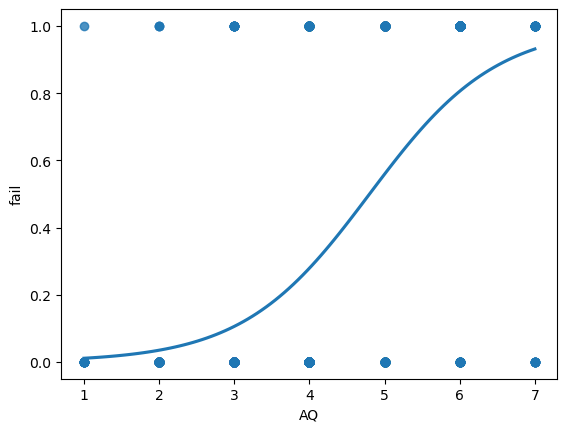

In [81]:
sns.regplot(x=data['AQ'], y=data['fail'], data=data, logistic=True, ci=None)


<Axes: xlabel='USS', ylabel='fail'>

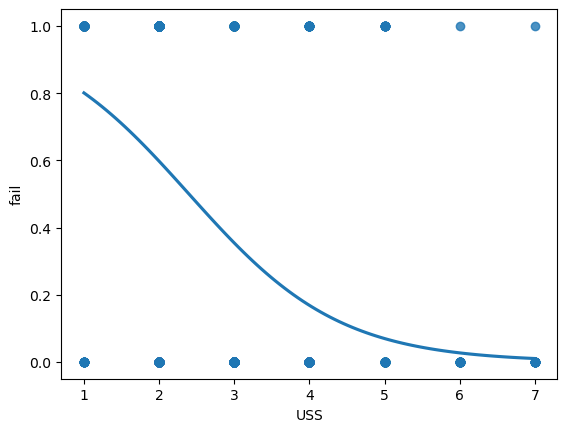

In [80]:
sns.regplot(x=data['USS'], y=data['fail'], data=data, logistic=True, ci=None)


<Axes: xlabel='CS', ylabel='fail'>

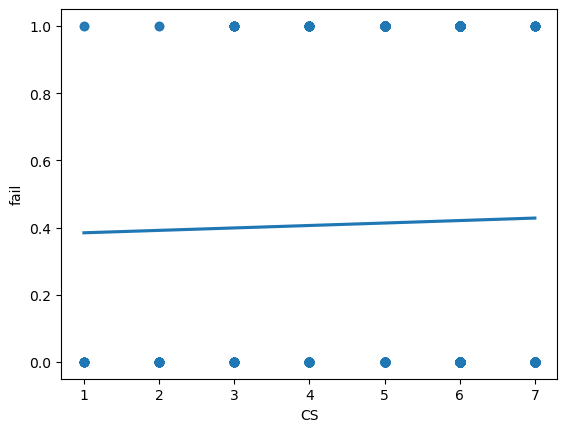

In [79]:
sns.regplot(x=data['CS'], y=data['fail'], data=data, logistic=True, ci=None)


<Axes: xlabel='VOC', ylabel='fail'>

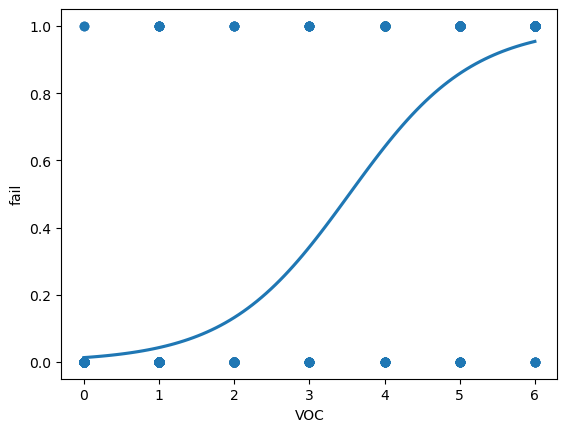

In [95]:
sns.regplot(x=data['VOC'], y=data['fail'], data=data, logistic=True, ci=None)



<Axes: xlabel='RP', ylabel='fail'>

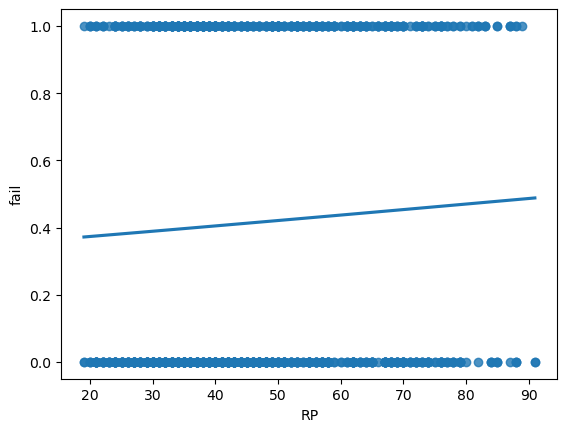

In [77]:
sns.regplot(x=data['RP'], y=data['fail'], data=data, logistic=True, ci=None)


<Axes: xlabel='IP', ylabel='fail'>

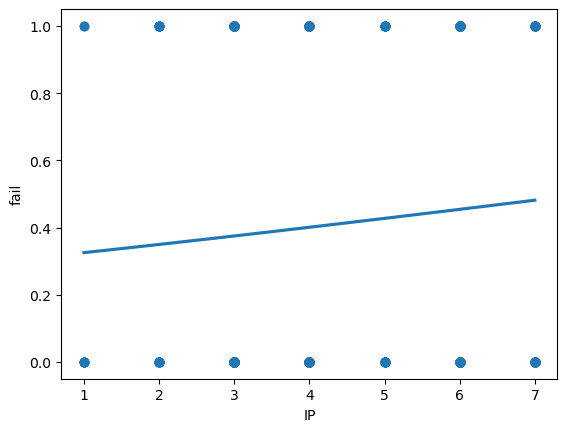

In [92]:
sns.regplot(x=data['IP'], y=data['fail'], data=data, logistic=True, ci=None)


<Axes: xlabel='Temperature', ylabel='fail'>

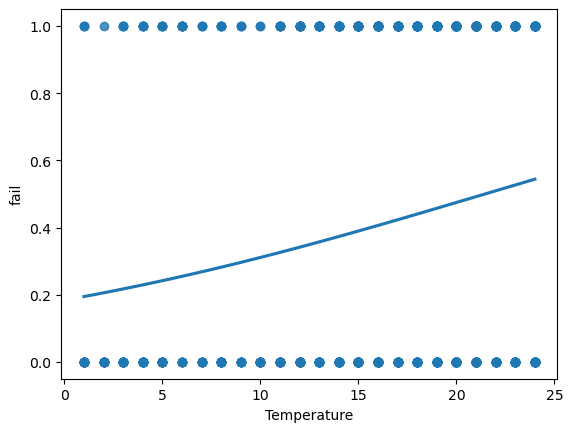

In [75]:
sns.regplot(x=data['Temperature'], y=data['fail'], data=data, logistic=True, ci=None)